### Students
Kemal Cagin Sertkaya - 2019400264

Leyla Yayladere - 2018400216

Mustafa Atay - 2020400333

### Q1.a




Decision boundary occurs when $h(x) = sign(w^Tx)$ changes from positive to negative or vice versa. In other words, when $w^Tx = 0$ there is a decision boundary. Therefore, $w^Tx = 0 \Rightarrow w_0 + w_1x_1 + w_2x_2 = 0 \Rightarrow x_2 = -\frac{w_0}{w_2} - \frac{w_1}{w_2} x_1$. Therefore, $a = -\frac{w_1}{w_2}$ and $b = -\frac{w_0}{w_2}$.



### Q1.b

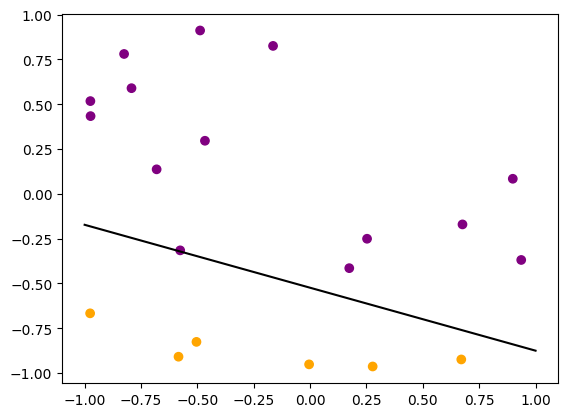

In [36]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Create a random line in the 2D plane as the target function.
a = 2 * np.random.random() - 1
b = 2 * np.random.random() - 1
target_function = lambda x: a * x + b

# Generate a dataset of size 20 by choosing random points in the 2D plane.
X = np.random.random((20, 2)) * 2 - 1

# Evaluate the target function on each point to get the corresponding output.
y = np.sign(X[:,1] - target_function(X[:,0]))

# Plot the examples {(xi,yi)} as well as the target function f on a plane.
plt.scatter(X[:,0], X[:,1], c=['purple' if yi == 1 else 'orange' for yi in y])
plt.plot([-1, 1], [target_function(-1), target_function(1)], 'black')
plt.show()

### Q1.c

Number of updates before converging: 5


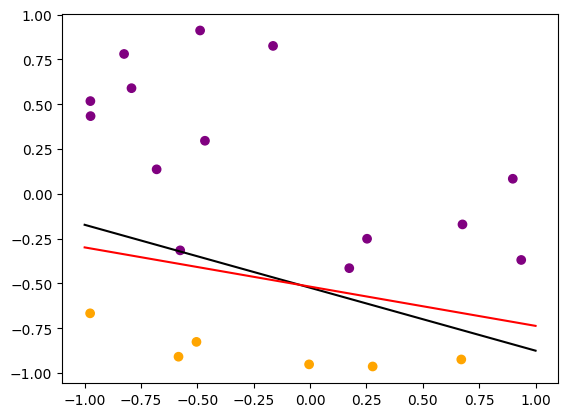

In [37]:
def Perceptron(X, y):
    # Initialize the weight vector to all zeros.
    w = np.zeros(3)
    # Number of updates the algorithm takes before converging.
    updates = 0

    # Repeat until all points are correctly classified.
    while True:
        misclassified = False

        for i in range(len(X)):
            # Add the bias term to the input vector.
            x_i = np.append([1], X[i])
            # Compute the dot product.
            dot = np.dot(w, x_i)
            # Compute the sign of the dot product.
            perceptron_output = np.sign(dot)

            # If a point is misclassified, then update the weight vector.
            if perceptron_output != y[i]:
                # Update the weight vector.
                w += y[i] * x_i
                updates += 1
                misclassified = True

        # If there are no misclassified points, break.
        if not misclassified:
            break

    return w, updates

w, updates = Perceptron(X, y)
print("Number of updates before converging: " + str(updates))

# Plot the examples {(xi,yi)}, the target function f.
plt.scatter(X[:, 0], X[:, 1], c=['purple' if yi == 1 else 'orange' for yi in y])
plt.plot([-1, 1], [target_function(-1), target_function(1)], 'black')

# Plot the final hypothesis g.
hypothesis = lambda x: -w[1]/w[2] * x - w[0]/w[2]
plt.plot([-1, 1], [hypothesis(-1), hypothesis(1)], 'red')
plt.show()

### Q1.d

Number of updates before converging: 447


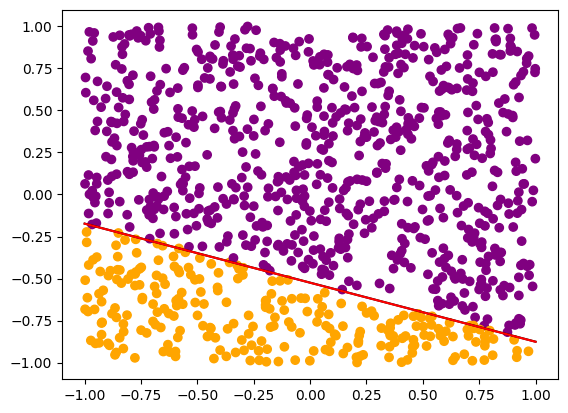

In [38]:
# Repeat the same procedure with a dataset of size 1000.
# Generate a dataset of size 1000 by choosing random points in the 2D plane.
X = np.random.random((1000, 2)) * 2 - 1

# One side of the line maps to +1 and the other side maps to -1.
y = np.sign(X[:,1] - target_function(X[:,0]))

w, updates = Perceptron(X, y)
hypothesis = lambda x: -w[1]/w[2] * x - w[0]/w[2]
print("Number of updates before converging: " + str(updates))

# Plot the examples {(xi,yi)} and the target function f.
plt.scatter(X[:, 0], X[:, 1], c=['purple' if yi == 1 else 'orange' for yi in y])
plt.plot([-1, 1], [target_function(-1), target_function(1)], 'black')

# Plot the final hypothesis g.
plt.plot([-1, 1], [hypothesis(-1), hypothesis(1)], 'red')
plt.show()

### Comparing Results with (c):
Comparing the results between 20-sized dataset and 1000-sized dataset, we observed that the final hypothesis g is closer to the target function f in the 1000-sized dataset.
However, the number of updates before converging is higher in the 1000-sized dataset. 
Since both datasets are separable, our perceptron learning algorithm will eventually converge. But with more data samples, this algorithm will take more step to converge. Because it has more probability to misclassify a point.
Therefore it will get closer to the target function f.

### Q2.a

In [39]:
import numpy as np
import os
from PIL import Image, ImageOps

def processImages(path, N):
    images = np.zeros((N, 64*64))
    for i in range(N):
        img = Image.open('{}/{}.jpg'.format(path, i))
        img = ImageOps.grayscale(img)
        pixels = np.array(img.getdata())
        images[i, :] = np.transpose(pixels) 
    return images

X_train_data = processImages('linearRegression_data/3dshapes_train', 10000)
print(X_train_data.shape) # should obtain a matrix of size 10,000x4096

(10000, 4096)


### Q2.b

We chose to use closed-form (analytical) solution of logistic regression, which is:

#### $w = (X^TX)^{-1}X^Ty$


In [40]:
# use closed-form solution for linear regression
def linearRegression(X, y, l = 30):
    # add bias term
    X_b = np.c_[X, np.ones((X.shape[0], 1))]
    # apply the formula and add regularization with lambda
    w = np.linalg.inv(X_b.T.dot(X_b) + l * np.identity(X_b.shape[1])).dot(X_b.T).dot(y)
    return w

y_train_actual = np.load('linearRegression_data/orientations_train.npy')

# train the linear regression model with the training data and find w_star
w_star = linearRegression(X_train_data, y_train_actual)
X_train_data_b = np.c_[X_train_data, np.ones((X_train_data.shape[0], 1))]
y_train_predictions = X_train_data_b.dot(w_star)

X_test_data = processImages('linearRegression_data/3dshapes_test', 1000)
# add bias term
X_test_data_b = np.c_[X_test_data, np.ones((X_test_data.shape[0], 1))]
y_test_predictions = X_test_data_b.dot(w_star)
y_test_actual = np.load('linearRegression_data/orientations_test.npy')


# calculate the root mean squared error
def rmse(predictions, targets):
    print(len(predictions))
    return np.sqrt((np.sum((predictions - targets)**2) / len(predictions)))

print('root mean square error for training data ' + str(rmse(y_train_predictions, y_train_actual)))
print('root mean square error for test data ' + str(rmse(y_test_predictions, y_test_actual)))

10000
root mean square error for training data 0.023956943392880816
1000
root mean square error for test data 0.08041820517013175


### Q2.c

We chose to use Principal Component Analysis (PCA) from scikit-learn to reduce the dimensionality of the data.
We chose PCA, because it has the following advantages:[2]

- The correlated features are removed, which reduces the dimensionality of the data.
- We only select the most important features, which reduces the computational cost also.
- After we calculated the density of our training set. There is no missing or zero value and >99% of the data is not near zero. Since PCA is most popular feature selection algorithm, if the dataset is not sparse, we can use PCA to reduce the dimensionality of the data.[1]

[1]: https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/
[2]: https://statisticsglobe.com/advantages-disadvantages-pca#advantages-of-the-pca

However, our RMSE has increased after applying PCA. This is probably because it has removed some important data. So, there is a trade-off between the computational time/cost and the accuracy of the model. 
With 4096 features in part b, it takes ~34.2 seconds with ~0.0021 RMSE in training data and 0.097 RMSE in test data. On the other hand, in part c, it takes ~16.4 seconds with ~0.2 RMSE in training data and ~0.22 RMSE in test data. Hence, we can observe that the computational time has decreased while the RMSE has increased.

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1000)
X_train_pca = pca.fit_transform(X_train_data)
X_test_pca = pca.transform(X_test_data)
print(X_train_pca.shape)

w_star_pca = linearRegression(X_train_pca, y_train_actual)

X_train_pca_b = np.c_[X_train_pca, np.ones((X_train_pca.shape[0], 1))]
y_train_pred_pca = X_train_pca_b.dot(w_star_pca)

X_test_pca_b = np.c_[X_test_pca, np.ones((X_test_pca.shape[0], 1))]
y_test_pred_pca = X_test_pca_b.dot(w_star_pca)

print("RMSE for training data with PCA: " + str(rmse(y_train_actual, y_train_pred_pca)))
print("RMSE for testing data with PCA: " + str(rmse(y_test_actual, y_test_pred_pca)))

(10000, 1000)
10000
RMSE for training data with PCA: 0.22416723466483301
1000
RMSE for testing data with PCA: 0.25289444598624405


### Q3.a

In [42]:
train_labels = np.load('logisticRegression_data/train_labels.npy')
train_data = np.load('logisticRegression_data/train_data.npy')

N = train_data.shape[0]

special_train_data = np.ones((N, 2))

def find_symmetry(x):
    x_flip = np.fliplr(x.reshape(16, 16)).reshape(256)
    sym = 0
    for i in range(256):
        sym -= abs(x[i] - x_flip[i])
    return sym

def find_intensity(x):
    return np.sum(x)

for i in range(N):
    special_train_data[i][0] = find_symmetry(train_data[i])
    special_train_data[i][1] = find_intensity(train_data[i])

test_labels = np.load('logisticRegression_data/test_labels.npy')
test_data = np.load('logisticRegression_data/test_data.npy')

N = test_labels.shape[0]

special_test_data = np.ones((N, 2))

for i in range(N):
    special_test_data[i][0] = find_symmetry(test_data[i])
    special_test_data[i][1] = find_intensity(test_data[i])


### Q3.b

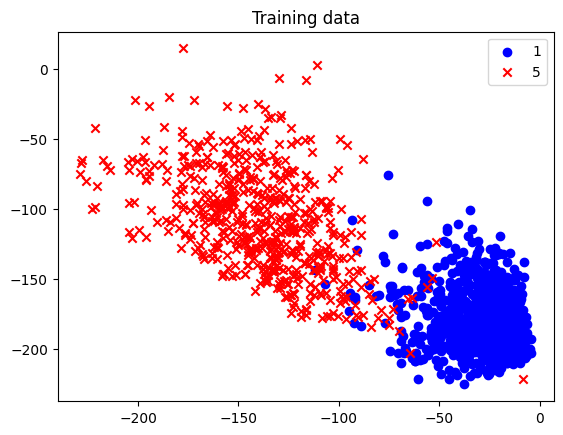

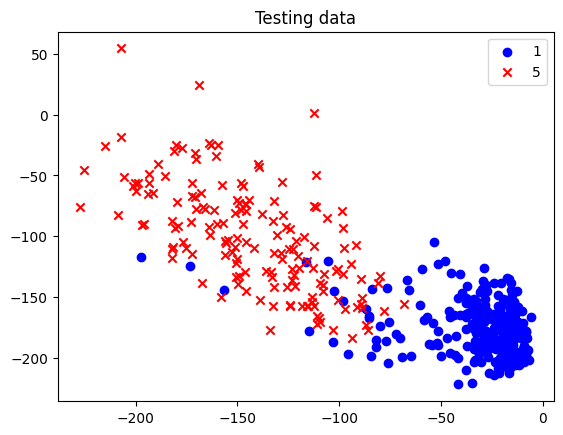

In [43]:
def plotData(X, y, title):
    plt.figure()
    plt.title(title)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', color='blue', label='1')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='x', color='red', label='5')
    plt.legend()
    plt.show()

plotData(special_train_data, train_labels, 'Training data')
plotData(special_test_data, test_labels, 'Testing data')


### Q3.c
$$\text{the gradient of the logistic loss:     } \frac{1}{N}  \sum_{n=1}^{N} X^T (\mathbf{\hat{y}} - y) $$

Train Errors: 31
Train Accuracy: 0.9801409352978859
Test Errors: 19
Test Accuracy: 0.9551886792452831


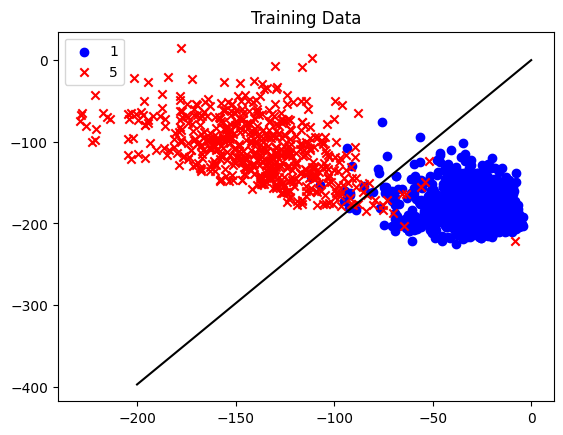

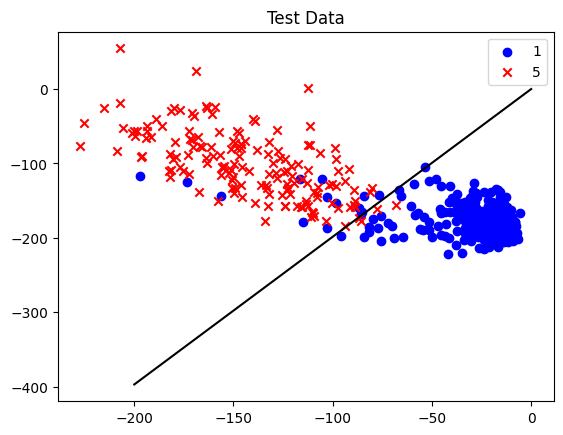

In [44]:
class LogisticRegression:
    def __init__(self, lr=0.01, iters=1000):
        self.lr = lr
        self.iters = iters

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def computeGradient(self, X, y, y_pred):
        return np.dot(X.T, (y_pred - y)) / y.shape[0]
    
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0

        for i in range(self.iters):
            y_pred = self.sigmoid(np.dot(X, self.w) + self.b)
            gradient = self.computeGradient(X, y, y_pred)
            self.w -= self.lr * gradient
            self.b -= self.lr * np.mean(y_pred - y)

    def predictProb(self, X):
        return self.sigmoid(np.dot(X, self.w) + self.b)
    
    def predict(self, X):
        return np.where(self.predictProb(X) >= 0.5, 1, 0)
    
def plotDecisionBoundary(X, y, model, title):
    plt.figure()
    plt.title(title)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', color='blue', label='1')
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', color='red', label='5')
    plt.legend()

    x1 =  np.linspace(-200, 0, 100)
    x2 = -(model.w[0] * x1 + model.b) / model.w[1]
    plt.plot(x1, x2, color='black')
    plt.show()

def calculateError(y, y_pred):
    errors = np.sum(np.abs(y - y_pred))
    accuracy = 1 - errors / y.shape[0]
    return errors, accuracy

#Normalize data
y_train_norm = np.where(train_labels == 1, 1, 0)
y_test_norm = np.where(test_labels == 1, 1, 0)

model = LogisticRegression()
model.fit(special_train_data, y_train_norm)
y_train_pred = model.predict(special_train_data)
y_test_pred = model.predict(special_test_data)

train_errors, train_accuracy = calculateError(y_train_norm, y_train_pred)
test_errors, test_accuracy = calculateError(y_test_norm, y_test_pred)

print("Train Errors: " + str(train_errors))
print("Train Accuracy: " + str(train_accuracy))
print("Test Errors: " + str(test_errors))
print("Test Accuracy: " + str(test_accuracy))

plotDecisionBoundary(special_train_data, y_train_norm, model, "Training Data")
plotDecisionBoundary(special_test_data, y_test_norm, model, "Test Data")

### Q3.d

In [45]:
from sklearn.model_selection import KFold

class RegularizedLogisticRegression(LogisticRegression):
    def __init__(self, lr=0.01, iters=1000, l=0.01):
        super().__init__(lr, iters)
        # l is the regularization parameter, lambda
        self.l = l
    
    # Change gradient descent computing function accordingly to train regularized model
    def computeGradient(self, X, y, y_pred):
        return np.dot(X.T, (y_pred - y)) / y.shape[0] + self.l * self.w
    
def crossValidation(X, y, lambda_values):
    kfold = KFold(n_splits=5, shuffle=True)
    acurracies = []

    for l in lambda_values:
        model = RegularizedLogisticRegression(l=l)
        fold_acurracies = []
        for train_index, test_index in kfold.split(X):
            X_train_fold, X_test_fold = X[train_index], X[test_index]
            y_train_fold, y_test_fold = y[train_index], y[test_index]
            model.fit(X_train_fold, y_train_fold)
            y_test_fold_pred = model.predict(X_test_fold)
            _, accuracy = calculateError(y_test_fold, y_test_fold_pred)
            fold_acurracies.append(accuracy)
        acurracies.append(np.mean(fold_acurracies))
    return lambda_values[np.argmax(acurracies)]

# Use flattened images as input vector
X_train_flat = train_data
X_test_flat = test_data


# Find best lambda with cross validation
lambda_values = [0, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
best_lambda = crossValidation(X_train_flat, y_train_norm, lambda_values)
print("Best lambda: " + str(best_lambda))

# Train model with best lambda
model_reg = RegularizedLogisticRegression(l=best_lambda)
model_reg.fit(X_train_flat, y_train_norm)
y_train_pred = model_reg.predict(X_train_flat)
y_test_pred = model_reg.predict(X_test_flat)

train_errors, train_accuracy = calculateError(y_train_norm, y_train_pred)
test_errors, test_accuracy = calculateError(y_test_norm, y_test_pred)

print("Train Errors: " + str(train_errors))
print("Train Accuracy: " + str(train_accuracy))
print("Test Errors: " + str(test_errors))
print("Test Accuracy: " + str(test_accuracy))

Best lambda: 0.003
Train Errors: 2
Train Accuracy: 0.9987187700192185
Test Errors: 4
Test Accuracy: 0.9905660377358491


##### Did regularization improve performance

In values [0, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30] for lambda, the best result came with labmda=0, which means no regilarization at all.

Therefore, we concluded that regularization didn't improve the accuracy. That is because, the data was not overfitting at the first place.